In [ ]:
import pandas as pd 
import sqlite3 as sql
from sqlalchemy import create_engine
from sqlalchemy import inspect
from datetime import datetime 
import seaborn as sns

In [ ]:
# Import CSV file in Google Colab 
from google.colab import files
uploaded = files.upload()

import io
WQ_Big_Lake_df = pd.read_csv(io.BytesIO(uploaded['Big_Lake_Sammamish.csv']))
WQ_Big_Lake_df.head(5)

Saving Big_Lake_Sammamish.csv to Big_Lake_Sammamish (1).csv


,Unnamed: 0,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [ ]:
# Drop Unnamed column 
WQ_Big_Lake_df.drop('Unnamed: 0',axis=1, inplace=True)
WQ_Big_Lake_df

,CollectDate,Ammmonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.00,9.15,1.0,0.270,0.011000,7.400,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.00,8.98,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.00,9.00,1.0,0.290,0.012000,7.400,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.00,9.21,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.00,9.20,1.0,0.280,0.012000,7.400,7.3,0.416667,0.019667,98.721299
...,...,...,...,...,...,...,...,...,...,...,...,...
9508,2008-12-09,0.01,103.00,8.00,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.585895
9509,2008-12-09,0.01,102.00,7.90,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.575930
9510,2008-12-09,0.01,102.00,7.80,37.0,0.209,0.008467,7.300,10.4,0.359000,0.017300,73.565999
9511,2008-12-09,0.01,102.25,7.90,37.0,0.210,0.008500,7.275,10.4,0.359000,0.017700,73.995892


In [ ]:
#Rename Ammmonia_Nitrogen to Ammonia_Nitrogen
WQ_Big_Lake_df.rename({'Ammmonia Nitrogen (mg/L)':'Ammonia Nitrogen (mg/L)'},axis='columns',inplace=True)
WQ_Big_Lake_df.head()

,CollectDate,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,1994-01-06,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,1994-01-06,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,1994-01-06,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,1994-01-06,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,1994-01-06,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [ ]:
# Data Summary
WQ_Big_Lake_df.describe()

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
count,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000,9513.000000
mean,0.019529,104.770451,8.794612,3.175549,0.250499,0.004699,7.749050,12.123462,0.450910,0.015715,88.783753
std,0.019682,6.294638,3.179340,8.541212,0.144454,0.004703,0.697979,4.751851,0.148650,0.010067,43.916247
min,0.010000,80.400000,0.000000,0.000000,0.020000,0.002000,6.100000,5.200000,0.050000,0.005000,12.702527
25%,0.010000,102.000000,8.100000,0.000000,0.149333,0.002000,7.200000,8.300000,0.359333,0.009700,58.949820
50%,0.012833,105.000000,9.400000,1.000000,0.246000,0.002650,7.600000,10.800000,0.436833,0.013800,86.358482
75%,0.020333,108.000000,10.713636,3.000000,0.336000,0.006117,8.300000,15.400000,0.528500,0.018733,114.044974
max,0.359000,165.000000,124.400000,180.000000,1.020000,0.129000,9.700000,25.200000,4.900000,0.193000,349.975650


In [ ]:
# convert string to datetime
WQ_Big_Lake_df["CollectDate"] = pd.to_datetime(WQ_Big_Lake_df["CollectDate"])

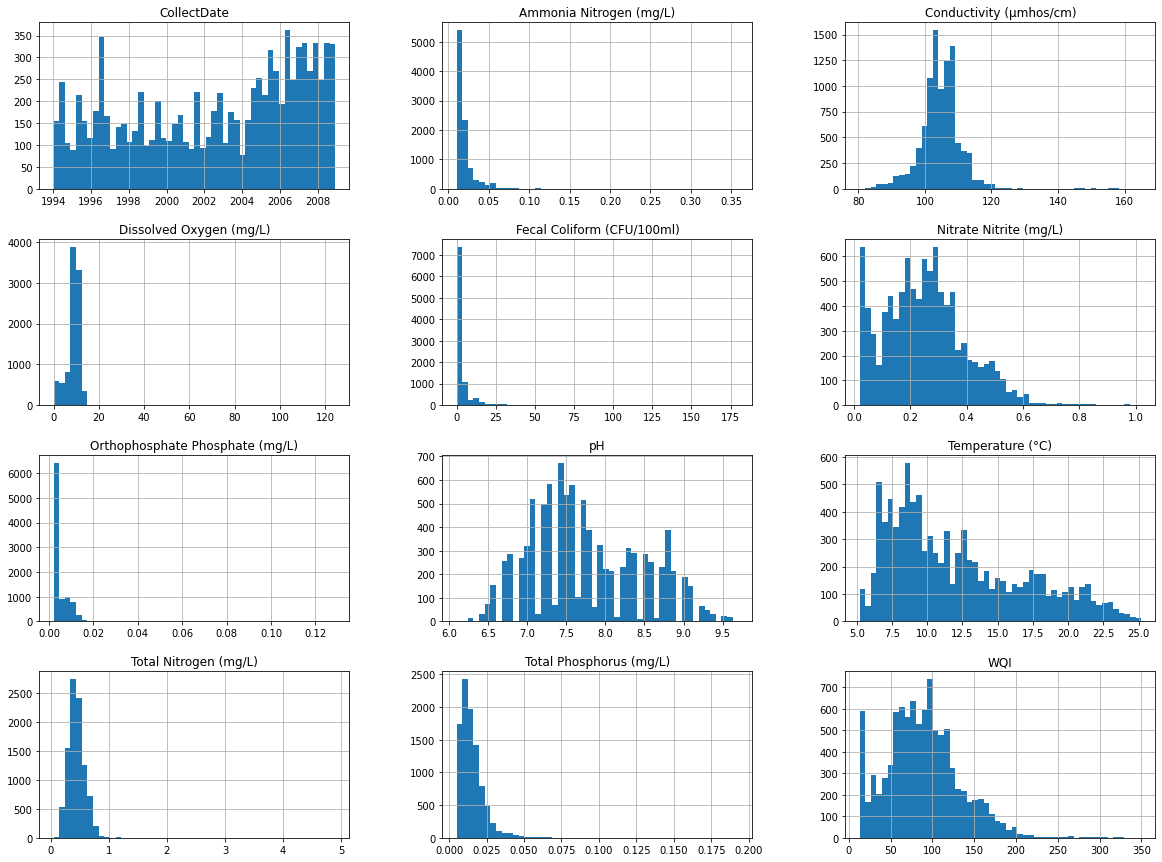

In [ ]:
# Histogram shows the number of instances that have a given value range. Using jupyter's magic command to specify which backend Matplotlib should use.
%matplotlib inline
import matplotlib.pyplot as plt
WQ_Big_Lake_df.hist(bins=50, figsize=(20,15))
plt.show()

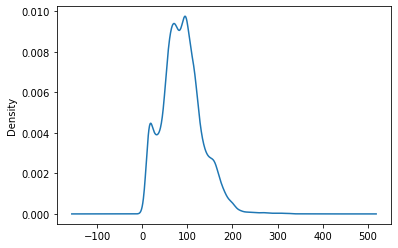

In [ ]:
# Visualize the value counts of target variable
WQ_Big_Lake_df["WQI"].plot.density()

In [ ]:
# Group by Collect Date 
WQ_Big_Lake_df_mean = WQ_Big_Lake_df.groupby(["CollectDate"]).mean()
WQ_Big_Lake_df_mean.head(5)

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


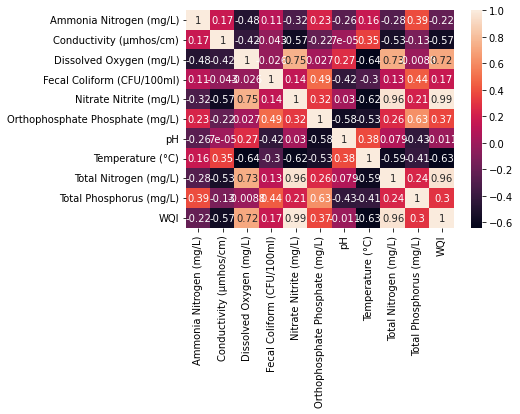

In [ ]:
sns.heatmap(WQ_Big_Lake_df_mean.corr(), annot=True)

In [ ]:
# correlation among the features of each features in the data frame.
corr_matrix = WQ_Big_Lake_df_mean.corr()
round(corr_matrix,2)

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
Ammonia Nitrogen (mg/L),1.00,0.17,-0.48,0.11,-0.32,0.23,-0.26,0.16,-0.28,0.39,-0.22
Conductivity (µmhos/cm),0.17,1.00,-0.42,-0.04,-0.57,-0.22,0.00,0.35,-0.53,-0.13,-0.57
Dissolved Oxygen (mg/L),-0.48,-0.42,1.00,-0.03,0.75,0.03,0.27,-0.64,0.73,-0.01,0.72
Fecal Coliform (CFU/100ml),0.11,-0.04,-0.03,1.00,0.14,0.49,-0.42,-0.30,0.13,0.44,0.17
Nitrate Nitrite (mg/L),-0.32,-0.57,0.75,0.14,1.00,0.32,0.03,-0.62,0.96,0.21,0.99
Orthophosphate Phosphate (mg/L),0.23,-0.22,0.03,0.49,0.32,1.00,-0.58,-0.53,0.26,0.63,0.37
pH,-0.26,0.00,0.27,-0.42,0.03,-0.58,1.00,0.38,0.08,-0.43,-0.01
Temperature (°C),0.16,0.35,-0.64,-0.30,-0.62,-0.53,0.38,1.00,-0.59,-0.41,-0.63
Total Nitrogen (mg/L),-0.28,-0.53,0.73,0.13,0.96,0.26,0.08,-0.59,1.00,0.24,0.96
Total Phosphorus (mg/L),0.39,-0.13,-0.01,0.44,0.21,0.63,-0.43,-0.41,0.24,1.00,0.30


In [ ]:
# Looking for the correlations between WQI and rest of the features
corr_matrix =WQ_Big_Lake_df_mean.corr()
round(corr_matrix["WQI"],2).sort_values(ascending=False)

WQI                                1.00
Nitrate Nitrite (mg/L)             0.99
Total Nitrogen (mg/L)              0.96
Dissolved Oxygen (mg/L)            0.72
Orthophosphate Phosphate (mg/L)    0.37
Total Phosphorus (mg/L)            0.30
Fecal Coliform (CFU/100ml)         0.17
pH                                -0.01
Ammonia Nitrogen (mg/L)           -0.22
Conductivity (µmhos/cm)           -0.57
Temperature (°C)                  -0.63
Name: WQI, dtype: float64

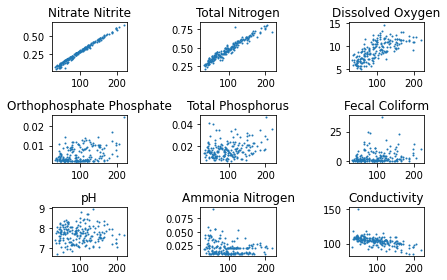

In [ ]:
# Scatter plots for each feature with Water Quality Index "WQI
fig,axis=plt.subplots(3,3)
axis[0,0].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Nitrate Nitrite (mg/L)"], s=1) 
axis[0, 0].set_title('Nitrate Nitrite')
axis[0,1].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Total Nitrogen (mg/L)"], s=1)
axis[0, 1].set_title('Total Nitrogen')
axis[0,2].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Dissolved Oxygen (mg/L)"], s=1)
axis[0, 2].set_title('Dissolved Oxygen')
axis[1,0].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Orthophosphate Phosphate (mg/L)"], s=1)
axis[1,0].set_title('Orthophosphate Phosphate')
axis[1,1].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Total Phosphorus (mg/L)"], s=1)
axis[1,1].set_title('Total Phosphorus')
axis[1,2].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Fecal Coliform (CFU/100ml)"], s=1)
axis[1,2].set_title('Fecal Coliform')
axis[2,0].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["pH"], s=1)
axis[2,0].set_title('pH')
axis[2,1].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Ammonia Nitrogen (mg/L)"], s=1)
axis[2,1].set_title('Ammonia Nitrogen')
axis[2,2].scatter(WQ_Big_Lake_df_mean["WQI"],WQ_Big_Lake_df_mean["Conductivity (µmhos/cm)"], s=1)
axis[2,2].set_title('Conductivity')
plt.tight_layout()
plt.show()

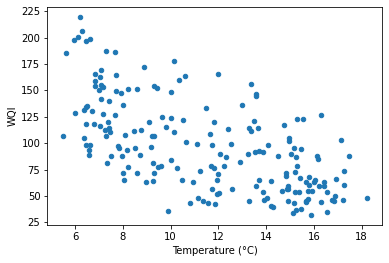

In [ ]:
WQ_Big_Lake_df_mean.plot(kind="scatter", x="Temperature (°C)", y="WQI")

In [ ]:
WQ_Big_Lake_df.dtypes

CollectDate                        datetime64[ns]
Ammonia Nitrogen (mg/L)                   float64
Conductivity (µmhos/cm)                   float64
Dissolved Oxygen (mg/L)                   float64
Fecal Coliform (CFU/100ml)                float64
Nitrate Nitrite (mg/L)                    float64
Orthophosphate Phosphate (mg/L)           float64
pH                                        float64
Temperature (°C)                          float64
Total Nitrogen (mg/L)                     float64
Total Phosphorus (mg/L)                   float64
WQI                                       float64
dtype: object

In [ ]:
WQI_df_1 = WQ_Big_Lake_df.drop(columns=["CollectDate"])
WQI_df_1.head()

,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
0,0.02,103.0,9.15,1.0,0.27,0.011,7.4,7.4,0.410000,0.017000,94.891147
1,0.02,104.0,8.98,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.699450
2,0.02,102.0,9.00,1.0,0.29,0.012,7.4,7.3,0.440000,0.019000,101.553997
3,0.02,105.0,9.21,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.722325
4,0.02,104.0,9.20,1.0,0.28,0.012,7.4,7.3,0.416667,0.019667,98.721299


In [ ]:
WQI_df_1["WQI"] = round(WQI_df_1["WQI"],2)

In [ ]:
#Create the database
conn = sql.connect('King_County_WQI.db')
c = conn.cursor()

In [ ]:
#Table of Parameters for King County Big Lakes 
create_sql="CREATE TABLE IF NOT EXISTS Big_Lake_Sammamish (collectdate INTEGER, Ammonia_Nitrogen INTEGER, Conductivity INTEGER, Dissolved_Oxygen INTEGER, Fecal_Coliform INTEGER, Nitrate_Nitrite INTEGER, Orthophosphate_Phosphate INTEGER, pH INTEGER, Temperature INTEGER, Total_Nitrogen INTEGER, Total_Phosphorous INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)




In [ ]:
# INSERTING VALUES
#DataFrame all at once 
WQ_Big_Lake_df_mean.to_sql(name="Big_Lake_Sammamish", con=conn, if_exists="replace",index=False)
WQ_Big_Lake_df_mean.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:2882: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


,Ammonia Nitrogen (mg/L),Conductivity (µmhos/cm),Dissolved Oxygen (mg/L),Fecal Coliform (CFU/100ml),Nitrate Nitrite (mg/L),Orthophosphate Phosphate (mg/L),pH,Temperature (°C),Total Nitrogen (mg/L),Total Phosphorus (mg/L),WQI
CollectDate,,,,,,,,,,,
1994-01-06,0.02,103.961538,9.138846,3.384615,0.292179,0.011353,7.396154,7.283333,0.427628,0.033821,106.640664
1994-02-14,0.02,104.280769,10.704615,6.884615,0.327179,0.009404,7.373077,6.438462,0.782308,0.035462,118.468342
1994-03-08,0.02,104.496154,10.938077,0.653846,0.377115,0.005288,7.523077,7.165385,0.581923,0.015936,127.209743
1994-03-22,0.02,104.957692,11.738462,2.576923,0.351538,0.002359,7.953846,7.373077,0.566026,0.017397,120.007024
1994-04-05,0.02,103.534615,12.773077,3.384615,0.316506,0.004715,8.415385,8.111538,0.514936,0.011218,107.715162


In [ ]:
#Table for WQI in the Excellent Range
create_sql= "CREATE TABLE IF NOT EXISTS Excellent_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [ ]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Excellent_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [ ]:
# WQI in the Excellent Range 
cursor=c.execute('''
SELECT collectdate,WQI
FROM Excellent_Range_WQI
WHERE WQI BETWEEN 91 and 100
ORDER BY WQI;''')
for row in cursor:
  print(row)

('1998-07-06 00:00:00', 91.23099676796963)
('2004-06-07 00:00:00', 91.8580358012221)
('2007-06-12 00:00:00', 92.3498112513325)
('2005-03-08 00:00:00', 93.58189989008396)
('2001-01-31 00:00:00', 93.68051149466275)
('1999-08-03 00:00:00', 94.26117327952251)
('2006-12-05 00:00:00', 95.02475040299761)
('1995-06-05 00:00:00', 95.20619184950446)
('2003-02-05 00:00:00', 95.75116416977947)
('2002-05-07 00:00:00', 96.24208418120371)
('2005-01-04 00:00:00', 97.42433698602602)
('1994-05-24 00:00:00', 97.99220161241098)
('2008-01-15 00:00:00', 98.12387074762304)
('1994-05-03 00:00:00', 98.63320107664369)
('2008-03-12 00:00:00', 98.69206039317045)
('2003-05-06 00:00:00', 98.98292651107826)
('2004-05-03 00:00:00', 99.25960291705347)


In [ ]:
#Table for WQI in the Good Range
create_sql= "CREATE TABLE IF NOT EXISTS Good_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [ ]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Good_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [ ]:
# WQI in the Good Range 
c.execute('''
SELECT collectdate,WQI
FROM Good_Range_WQI 
WHERE WQI BETWEEN 76 and 90
ORDER BY WQI;''')
for row in cursor:
  print(row)

In [ ]:
#Table for WQI in the Fair Range
create_sql= "CREATE TABLE IF NOT EXISTS Fair_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [ ]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Fair_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [ ]:
# WQI in the Fair Range 
c.execute('''
SELECT collectdate,WQI
FROM Fair_Range_WQI
WHERE WQI BETWEEN 51 and 75
ORDER BY WQI;''')
for row in cursor:
  print(row)



In [ ]:
#Table for WQI in the Poor Range
create_sql= "CREATE TABLE IF NOT EXISTS Poor_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [ ]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Poor_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [ ]:
# WQI in the Poor Range 
c.execute('''
SELECT collectdate,WQI
FROM Poor_Range_WQI
WHERE WQI BETWEEN 26 and 50
ORDER BY WQI;''')
for row in cursor:
  print(row)


In [ ]:
#Table for WQI in the Very Poor Range
create_sql= "CREATE TABLE IF NOT EXISTS Very_Poor_Range_WQI (collectdate INTEGER, WQI INTEGER)"
cursor=conn.cursor()
cursor.execute(create_sql)

In [ ]:
from tables.table import Column
#Row by row method 
for row in WQ_Big_Lake_df_mean.itertuples():
    #print(row[13]) 
    insert_sql=f"INSERT INTO Very_Poor_Range_WQI (collectdate,WQI) VALUES('{row[0]}','{row[11]}')"
    cursor.execute(insert_sql) 

In [ ]:
# WQI in the Very Poor Range 
c.execute('''
SELECT collectdate,WQI
FROM Very_Poor_Range_WQI
WHERE WQI BETWEEN 0 and 25
ORDER BY WQI;''')
for row in cursor:
  print(row)





In [ ]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import tensorflow as tf

In [ ]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler

X = WQI_df_1.drop(["WQI"],1).values
y = WQI_df_1["WQI"].values.reshape(-1,1)


# To check the number of shapes
print(X.shape)
print(y.shape)

# To check the first five entries
print(y[:5])

(9513, 10)
(9513, 1)
[[ 94.89]
 [ 98.7 ]
 [101.55]
 [ 98.72]
 [ 98.72]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
# Create a StandardScaler instances
scaler_X = skl.preprocessing.StandardScaler()
scaler_y = skl.preprocessing.StandardScaler()

# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)


# Fit the scaler
scaler_X.fit(X_train)
scaler_y.fit(y_train)

# Scale the data
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
# y_train_scaled = scaler_y.transform(y_train)
# y_test_scaled = scaler_y.transform(y_test)
y_train
y_test

print(X_train_scaled.shape)
print(y_train.shape)
print(X_test_scaled.shape)
print(y_test.shape)

(7134, 10)
(7134, 1)
(2379, 10)
(2379, 1)


In [ ]:
# importing the libraries
from keras.models import Sequential
from keras.layers import Dense
 
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = 10
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 15

model = tf.keras.models.Sequential()

# First hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))


# Second hidden layer
model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
model.add(tf.keras.layers.Dense(units=1, activation="linear"))


# Check the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                330       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 811
Trainable params: 811
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model
#model.compile(loss='mean_squared_error', optimizer="adam", metrics=["mse"])
model.compile(loss='mean_squared_error', optimizer="adam")

In [ ]:
# Fitting the ANN to the Training set
history = model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled, y_test), epochs=100)

Epoch 1/100
223/223 [==============================] - 2s 4ms/step - loss: 8120.7705 - val_loss: 4807.9858
Epoch 2/100
223/223 [==============================] - 1s 3ms/step - loss: 1790.6787 - val_loss: 626.7322
Epoch 3/100
223/223 [==============================] - 1s 3ms/step - loss: 587.5225 - val_loss: 437.1029
Epoch 4/100
223/223 [==============================] - 1s 3ms/step - loss: 446.0149 - val_loss: 327.1695
Epoch 5/100
223/223 [==============================] - 1s 3ms/step - loss: 350.0305 - val_loss: 254.7305
Epoch 6/100
223/223 [==============================] - 1s 3ms/step - loss: 277.8290 - val_loss: 201.6263
Epoch 7/100
223/223 [==============================] - 1s 3ms/step - loss: 226.2815 - val_loss: 160.3199
Epoch 8/100
223/223 [==============================] - 1s 3ms/step - loss: 182.0582 - val_loss: 127.9314
Epoch 9/100
223/223 [==============================] - 1s 3ms/step - loss: 147.1625 - val_loss: 103.7040
Epoch 10/100
223/223 [==============================

In [ ]:
# Making predictions using the testing data.
y_pred = model.predict(X_test_scaled)
print(y_pred.shape)
print(y_pred)

75/75 [==============================] - 0s 2ms/step
(2379, 1)
[[ 94.758286]
 [ 71.19563 ]
 [ 99.54159 ]
 ...
 [165.01521 ]
 [ 47.842293]
 [110.93454 ]]


In [ ]:
print(y_test)

[[ 94.93]
 [ 71.04]
 [ 99.44]
 ...
 [164.89]
 [ 47.9 ]
 [111.03]]


In [ ]:
y_pred_new = []
for i in y_pred:
    y_pred_new.append(i[0])
    
y_test_new = []
for i in y_test:
    y_test_new.append(i[0])

In [ ]:
import pandas as pd

accuracy_df = pd.DataFrame({"Prediction":y_pred_new, "Actual":y_test_new})
accuracy_df.head(20)

,Prediction,Actual
0,94.758286,94.93
1,71.195633,71.04
2,99.541588,99.44
3,212.291580,212.42
4,166.966888,166.89
5,81.382774,81.42
6,183.571198,183.53
7,66.926361,66.86
8,91.912704,92.20
9,99.032692,98.94


In [ ]:
# INSERTING VALUES
#DataFrame all at once 
accuracy_df.to_sql(name="Predictions_Vs_Actual ", con=conn, if_exists="replace",index=False)
accuracy_df.head()

,Prediction,Actual
0,94.758286,94.93
1,71.195633,71.04
2,99.541588,99.44
3,212.291580,212.42
4,166.966888,166.89


In [ ]:
# evaluate the model
train_mse = model.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model.evaluate(X_test_scaled,y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))

Train: 0.029, Test: 0.051


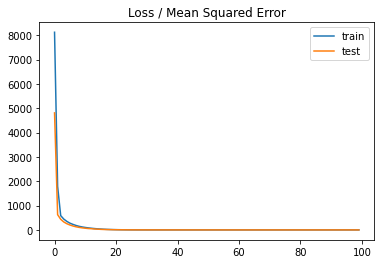

In [ ]:
from matplotlib import pyplot
#plot loss during training
pyplot.title('Loss / Mean Squared Error')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
#pyplot.plot(history.history['mean_squared_error'], label='mse')
pyplot.legend()
pyplot.show()

In [ ]:
# Close database connection
conn.commit()
conn.close()